# Numerical methods (Численные методы)

# 1 задание 

Определить корни уравнения графически и уточнить один из них итерационными методами (методом деления отрезка пополам, методом простой итерации и методом Ньютона) с точностью 0,001:
f(x) = x^3 + 7x - 7

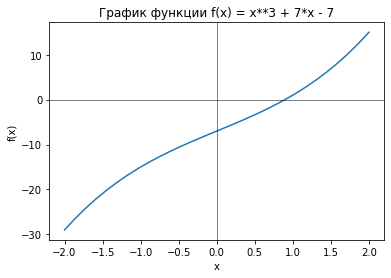

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


f = lambda x: x**3 + 7*x - 7

# Создаем массив значений x
x = np.linspace(-2, 2, 30)

# Вычисляем значения функции для каждого значения x
y = f(x)

# Строим график
plt.plot(x, y)

# Добавляем заголовок и подписи осей
plt.title('График функции f(x) = x**3 + 7*x - 7')
plt.xlabel('x')
plt.ylabel('f(x)')

# Добавляем оси координат
plt.axhline(y=0, color='k', lw=0.5)
plt.axvline(x=0, color='k', lw=0.5)

# Отображаем график
plt.show()

## метод деления отрезка пополам

Метод деления отрезка пополам (или метод бисекции) - это простой численный метод для решения нелинейных уравнений. Он основан на теореме о промежуточных значениях и заключается в следующем:

1. Выбирается начальный отрезок [a, b], на котором известно, что функция f(x) меняет знак.
2. Находится середина отрезка c = (a + b) / 2 и вычисляется значение функции в этой точке f(c).
3. Если f(c) равно нулю или достаточно близко к нулю, то метод завершается и возвращается значение c.
4. Иначе выбирается половина отрезка, на которой функция меняет знак, и процесс повторяется с этой половиной.

Этот процесс продолжается до тех пор, пока не будет достигнута требуемая точность или максимальное количество итераций.



In [2]:
def bisection(f, a, b, tol, max_iter):
    if f(a) * f(b) > 0:
        raise ValueError("Function has same sign at endpoints")
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    raise ValueError("Failed to converge")


a, b, tol, max_iter = 0, 1.5, 1e-3, 100
root = bisection(f, a, b, tol, max_iter)

# Print the approximate root and the value of the function at the root
print(f"Корень: {root}")

Корень: 0.8968505859375


## метод простой итерации 

Метод простой итерации - это численный метод для решения нелинейных уравнений вида x = g(x). Он основан на преобразовании уравнения в эквивалентное уравнение x = f(x), где f(x) = x - g(x).

Процесс решения уравнения методом простой итерации заключается в следующем:

1. Выбирается начальное приближение x0.
2. Вычисляется следующее приближение x1 = g(x0).
3. Процесс повторяется до тех пор, пока не будет достигнута требуемая точность или максимальное количество итераций.

Если последовательность приближений x0, x1, x2, ... сходится к решению уравнения, то метод считается успешным.

In [3]:
def g(x):  # The basic idea is to transform the original equation f(x) = 0 into an equivalent equation x = g(x), 
    return (7 - x**3)/7

def simple_iteration(guess, tol, max_iters):
    x_prev = guess
    for i in range(max_iters):
        x_next = g(x_prev)
        if abs(x_next - x_prev) < tol:
            return x_next
        x_prev = x_next
    raise Exception("Failed to converge")

root = simple_iteration(1, tol, max_iter)
print(f"Корень: {root}")

Корень: 0.8971092932453049


## метод Ньютона (или метод касательных)

Метод Ньютона (или метод касательных) - это численный метод для решения нелинейных уравнений вида f(x) = 0. Он основан на разложении функции f(x) в ряд Тейлора в окрестности точки x0:

    f(x) = f(x0) + f'(x0)(x - x0) + f''(x0)/2 (x - x0)^2 + ...

Если мы ограничимся первым членом этого ряда, то получим линейное приближение к функции f(x):

    f(x) ≈ f(x0) + f'(x0)(x - x0)
Это линейное приближение можно приравнять к нулю и решить уравнение относительно x:

    x = x0 - f(x0) / f'(x0)
Это и есть формула метода Ньютона.

Процесс решения уравнения методом Ньютона заключается в следующем:

1. Выбирается начальное приближение x0.
2. Вычисляется следующее приближение x1 = x0 - f(x0) / f'(x0).
3. Процесс повторяется до тех пор, пока не будет достигнута требуемая точность или максимальное количество итераций.

Если последовательность приближений x0, x1, x2, ... сходится к решению уравнения, то метод считается успешным.

In [4]:
def newton_method(f, df, x0, tol, max_iter):
    """
    f: функция, корень которой мы ищем
    df: производная функции f
    x0: начальное значение для метода Ньютона
    tol: погрешность
    max_iter: максимальное количество итераций
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x
        dfx = df(x)
        if dfx == 0:
            break
        x = x - fx / dfx
    return None


df = lambda x: 3*x**2 + 7

# Вызываем метод Ньютона
root = newton_method(f, df, 0, tol, max_iter)

print(f"Корень: {root}")

Корень: 0.8969247083775186


# 2 задание. СЛАУ

Решить систему уравнений 
1. методом Гаусса
2. методом Зейделя с точностью до 0.0001

In [5]:
A = np.array([[7, 2, -1, 1, -1],
              [0, -6, 1, 1, -2],
              [-3, 1, 8, 1, 1],
              [2, 2, -3, 9, 0],
              [1, -2, -3, 1, -9]], dtype=float)
b = np.array([54, 12, -3, 20, 31], dtype=float)

## решение методом Гаусса

Вот как это работает:

1. Сначала мы делим каждую строку на первый элемент этой строки.
2. Затем мы вычитаем первую строку из всех остальных строк, чтобы получить нули в первом столбце под первым элементом.
3. Затем мы повторяем этот процесс для второго столбца и так далее до тех пор, пока не получим верхнетреугольную матрицу.
4. Затем мы используем обратный ход для нахождения решения.

In [6]:
def gaussElim(a,b):
    n = len(b)
    # Elimination phase
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]  # вычисляем новую строку матрицы
                b[i] -= lam*b[k]  # update vector b
                # backward substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

print("Ответ:")
for index, item in enumerate(gaussElim(A,b)):
  print(f"x{index + 1} = {item:.4f}")

Ответ:
x1 = 7.4706
x2 = -0.2059
x3 = 2.6765
x4 = 1.5000
x5 = -3.2941


## метод Зейделя с точностью до 0.0001

Метод Зейделя является итерационным методом решения систем линейных уравнений. Он работает путем последовательного приближенного вычисления компонент решения на каждой итерации.

Идея метода Зейделя заключается в следующем: на каждой итерации мы вычисляем новые значения компонент решения последовательно, начиная с первой. При вычислении каждой компоненты мы используем уже вычисленные на текущей итерации значения других компонент. Таким образом, на каждой итерации мы уточняем значение каждой компоненты решения, основываясь на уже уточненных значениях других компонент.

Алгоритм метода Зейделя состоит в следующем:

1. Задать начальное приближение решения x.
2. Повторять следующие действия до достижения требуемой точности или максимального числа итераций:
    1. Вычислить новое приближение решения x_new:
        1. Для каждой компоненты i вычислить сумму s1, состоящую из произведений элементов матрицы A[i][:i] на соответствующие компоненты вектора решения x_new с индексами до i (т.е. уже вычисленные на текущей итерации значения).
        2. Для каждой компоненты i вычислить сумму s2, состоящую из произведений элементов матрицы A[i][i+1:] на соответствующие компоненты вектора решения x с индексами от i+1 до конца (т.е. старые значения, вычисленные на предыдущих итерациях).
        3. Вычислить новое приближение x_new[i] как разность (b[i] - s1 - s2) / A[i][i].
    2. Проверить, достигли ли мы требуемой точности: если норма разности ||x - x_new|| меньше заданной точности eps, то выйти из цикла.
    3. Присвоить x значение x_new и перейти на следующую итерацию.
3. Вернуть решение x.


Метод Зейделя сходится не всегда и зависит от специфики системы уравнений, поэтому может потребоваться использовать другой метод, например, метод Гаусса.

In [7]:
A = np.array([[7, 2, -1, 1, -1],
              [0, -6, 1, 1, -2],
              [-3, 1, 8, 1, 1],
              [2, 2, -3, 9, 0],
              [1, -2, -3, 1, -9]])
b = np.array([54, 12, -3, 20, 31])

In [8]:
import numpy as np

def seidel(A, b, eps=1e-4, max_iter=1000):
    n = len(A)
    x = np.zeros(n)
    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            s1 = np.dot(A[i][:i], x_new[:i])
            s2 = np.dot(A[i][i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        if np.linalg.norm(x - x_new) < eps:
            break
        x = x_new
    return x    
    
# Вызываем метод Зейделя
x = seidel(A, b)

print("Ответ:")
for index, item in enumerate(seidel(A,b)):
  print(f"x{index + 1} = {item:.4f}")

Ответ:
x1 = 7.4706
x2 = -0.2059
x3 = 2.6765
x4 = 1.5000
x5 = -3.2941


# 3 задание. Вычислить интеграл f(x)dx
используя формулы трапеций и Симпсона, оценить погрешности вычислений.

f(x) = x^3 + 7x - 7, верхняя граница a = 1, нижняя граница b = 2 + m/10, количество отрезков разбиения = 20.

In [9]:
f = lambda x: x**3 + 7*x - 7
a, b, n = 1, 3.8, 20

## Формула трапеций

Функция trapezoidal_rule вычисляет приближенное значение интеграла методом трапеций с шагом h = (b - a) / n. В первом цикле мы вычисляем значение интеграла I1 с шагом h, а во втором цикле - значение интеграла I2 с шагом h / 2. После этого мы вычисляем погрешность метода Рунге как разницу между значениями интегралов I1 и I2, деленную на 3.

In [10]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    I1 = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        x = a + i * h
        I1 += f(x)
    I1 *= h
    I2 = 0.5 * (f(a) + f(b))
    for i in range(1, 2 * n):
        x = a + i * h / 2
        I2 += f(x)
    I2 *= h / 2
    error = abs(I2 - I1) / 3
    return I1, error

integral_approx, error = trapezoidal_rule(f, a, b, n)
print("Приближенное значение интеграла:", integral_approx)
print("Оценка погрешности:", error)

Приближенное значение интеграла: 79.38425599999998
Оценка погрешности: 0.01646399999999441


## Формула Симпсона

Формула Симпсона использует параболическую аппроксимацию подынтегральной функции на каждом шаге. Это означает, что формула Симпсона использует параболу для приближения подынтегральной функции на каждом шаге интегрирования.

Формула Симпсона для вычисления интеграла от функции f(x) на отрезке [a,b] с четным числом узлов равна:

∫[a,b]f(x)dx ≈ (b-a) / 6 * (f(a) + 4f((a+b)/2) + f(b))

где (a+b)/2 - средняя точка отрезка [a,b].

Если число узлов нечетно, то мы можем разбить отрезок на нечетное число интервалов и воспользоваться формулой Симпсона для каждого интервала, кроме последнего, где мы применяем формулу трапеций.

In [11]:
def simpsons_rule(f, a, b, n):
    """
    Вычисляет интеграл функции f на интервале [a, b] с использованием формулы Симпсона.

    :param f: функция, которую нужно проинтегрировать.
    :param a: левая граница интервала интегрирования.
    :param b: правая граница интервала интегрирования.
    :param n: количество интервалов, на которые нужно разбить [a, b].
    :return: приближенное значение интеграла и погрешность.
    """
    h = (b - a) / n  # Вычисляем шаг разбиения
    x = np.linspace(a, b, n+1)  # Создаем сетку узлов
    y = f(x)  # Вычисляем значения функции на сетке
    integral_approx = h / 3 * np.sum(y[:-1:2] + 4*y[1::2] + y[2::2])  # Формула Симпсона
    return integral_approx

integral_approx = simpsons_rule(f, a, b, n)
integral_approx_half = simpsons_rule(f, a, b, n * 3)
error = abs(integral_approx_half - integral_approx) / 2
print("Приближенное значение интеграла:", integral_approx)
print("Оценка погрешности:", error)

Приближенное значение интеграла: 79.31839999999998
Оценка погрешности: 7.105427357601002e-15


# 4 задание.

## С помощью интерполяционных многочленов степени от 1 до 4 найти значения функции, заданной таблично и оценить погрешность



Этот код реализует интерполяционный метод Лагранжа для заданного набора данных x и y. Для каждой степени интерполяционного многочлена от 1 до 4, код вычисляет значение многочлена в заданной точке x0 и выводит результат на экран.

Метод Эйткена используется для оценки погрешности интерполяционного многочлена. Он основан на том, что более точное приближение функции может быть получено путем интерполяции многочлена меньшей степени. В этом коде мы используем метод Эйткена для оценки погрешности интерполяции многочленов степени 3 и выше.

In [1]:
import numpy as np

# задаем табличную функцию
x = np.array(list(range(-1, 4)))
y = np.array([19.2, 15.1, 13.2, 14.76, 15.54])
x0 = 1.9

# Lagrange interpolation function
def lagrange_interp(x, x_vals, y_vals, degree):
    n = degree + 1
    assert n <= len(x_vals)
    
    interp_poly = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        interp_poly += term
    return interp_poly


for degree in range(1, 5):
    interp_poly = lagrange_interp(x0, x, y, degree)
    print(f"Интерполяционный многочлен степени {degree} при x = {x0}: {interp_poly:.4f}")
    
    # Оценка по Эйткену (Aitken method)
    if degree >= 3:
        interp_poly_1 = lagrange_interp(x0, x, y, degree-1)
        interp_poly_2 = lagrange_interp(x0, x, y, degree-2)
        error = abs((interp_poly - interp_poly_1)**2 / (interp_poly_2 - 2*interp_poly_1 + interp_poly))
        print(f"Погрешность Эйткена при степени {degree}: {error:.4f}")

Интерполяционный многочлен степени 1 при x = 1.9: 7.3100
Интерполяционный многочлен степени 2 при x = 1.9: 13.3710
Интерполяционный многочлен степени 3 при x = 1.9: 14.4124
Погрешность Эйткена при степени 3: 0.2161
Интерполяционный многочлен степени 4 при x = 1.9: 14.5260
Погрешность Эйткена при степени 4: 0.0139


# 5 задание

## Решить задачу Коши
1. методами Эйлера
2. модифицированным методом Эйлера
3. методом Рунге-Кутты 4-го порядка на заданном отрезке

и оценить погрешность:
y'=x+2y, 	y(0)= -1, 	x принадлежит [0;2], 	h=0,25 


In [13]:
def f(x, y):
    return x + 2*y
x0, y0 = 0, -1
xf = 2
h = 0.25

## Методом Эйлера

Для решения задачи Коши методом Эйлера сначала необходимо записать дифференциальное уравнение в виде системы уравнений первого порядка:

y' = f(x, y)

где y - искомая функция, f(x, y) - правая часть дифференциального уравнения.

Для решения системы уравнений первого порядка методом Эйлера используется следующий алгоритм:

1. Задать начальные условия y(x0) = y0, где x0 - начальная точка, y0 - начальное значение функции.
2. Задать шаг h.
3. Найти значение y(x+h) методом Эйлера, используя формулу: y(x+h) = y(x) + h * f(x, y)
4. Повторять шаг 3, пока x не достигнет конечной точки.

### Погрешность
Для оценки погрешности метода Эйлера с пересчетом можно использовать формулу Рунге-Ромберга:

err = |y(x+h) - y(x+h/2)| / (2^p - 1)

где p - порядок метода (в данном случае p=2), y(x+h) - значение функции, найденное модифицированным методом Эйлера, y(x+h/2) - значение функции, найденное методом Эйлера с половинным шагом.

Погрешность будет выведена на график в правом нижнем углу.

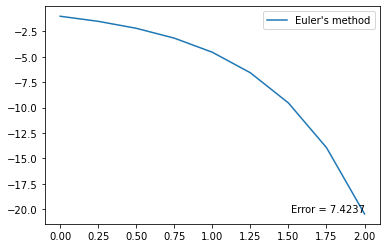

In [14]:
# Создаем массивы для значений x и y
x = np.arange(x0, xf + h, h)
y = np.zeros_like(x)

# Задаем начальное значение y
y[0] = y0

# Решаем дифференциальное уравнение методом Эйлера
for i in range(1, len(x)):
    y[i] = y[i-1] + h * f(x[i-1], y[i-1])

# Вычисляем значение функции на двойном шаге h
x_double = np.arange(x0, xf + h/2, h/2)
y_double = np.zeros_like(x_double)
y_double[0] = y0
for i in range(1, len(x_double)):
    y_double[i] = y_double[i-1] + h/2 * f(x_double[i-1], y_double[i-1])

# Вычисляем погрешность метода Эйлера
err = np.abs(y[-1] - y_double[-1])

# Строим график решения
plt.plot(x, y, label="Euler's method")
plt.legend()

# Выводим погрешность на график
plt.text(xf, y[-1], f"Error = {err:.4f}", ha="right", va="bottom")

plt.show()

## модифицированным методом Эйлера

Модифицированный метод Эйлера, также известный как метод Эйлера с пересчетом, является усовершенствованным вариантом обычного метода Эйлера. Он учитывает нелинейность дифференциального уравнения и дает более точное приближенное решение. Вот алгоритм модифицированного метода Эйлера для решения задачи Коши:

1. Задать начальные условия y(x0) = y0, где x0 - начальная точка, y0 - начальное значение функции.
2. Задать шаг h.
3. Найти значение y(x+h/2) методом Эйлера, используя формулу:


y_temp = y(x) + h/2 * f(x, y)


y(x+h/2) = y(x) + h/2 * f(x, y) + h/2 * f(x+h/2, y_temp)

4. Повторять шаги 3-4, пока x не достигнет конечной точки.

Для оценки погрешности метода Эйлера можно использовать ту же формулу Рунге-Ромберга:

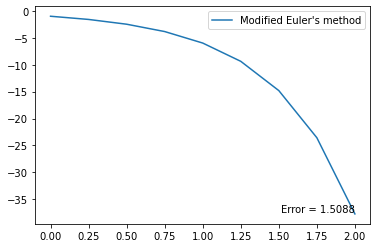

In [15]:
# Создаем массивы для значений x и y
x = np.arange(x0, xf + h, h)
y = np.zeros_like(x)

# Задаем начальное значение y
y[0] = y0

# Решаем дифференциальное уравнение модифицированным методом Эйлера
for i in range(1, len(x)):
    y_temp = y[i-1] + h/2 * f(x[i-1], y[i-1])
    y[i] = y[i-1] + h * f(x[i-1] + h/2, y_temp)

# Вычисляем значение функции с половинным шагом
x_half = np.arange(x0, xf + h/2, h/2)
y_half = np.zeros_like(x_half)
y_half[0] = y0

for i in range(1, len(x_half)):
    y_temp = y_half[i-1] + h/4 * f(x_half[i-1], y_half[i-1])
    y_half[i] = y_half[i-1] + h/2 * f(x_half[i-1], y_temp)
# Вычисляем погрешность
err = np.abs(y[-1] - y_half[-1]) / (2**2 - 1)

# Строим график решения
plt.plot(x, y, label="Modified Euler's method")
plt.legend()

# Выводим погрешность на график
plt.text(xf, y[-1], f"Error = {err:.4f}", ha="right", va="bottom")

plt.show()

## метод Рунге-Кутты 4-го порядка на заданном отрезке

Для решения задачи Коши методом Рунге-Кутты 4-го порядка на заданном отрезке необходимо выполнить следующие шаги:

1. Определить правую часть дифференциального уравнения.
2. Задать начальные условия.
3. Задать конечную точку отрезка и шаг.
4. Решить дифференциальное уравнение методом Рунге-Кутты 4-го порядка.
5. Вычислить погрешность.

Метод Рунге-Кутты 4-го порядка в точке xi основывается на вычислении четырех коэффициентов k1, k2, k3 и k4, которые определяются следующим образом:

k1 = f(xi, yi)
k2 = f(xi + h/2, yi + h/2 * k1)
k3 = f(xi + h/2, yi + h/2 * k2)
k4 = f(xi + h, yi + h * k3)

Затем находим значение y(xi+1) следующим образом:

yi+1 = yi + h/6 * (k1 + 2k2 + 2k3 + k4)

После вычисления значения функции y(xi+1) в точке xi+1, шаг повторяется для следующей точки xi+1, и так до достижения конца отрезка xn.

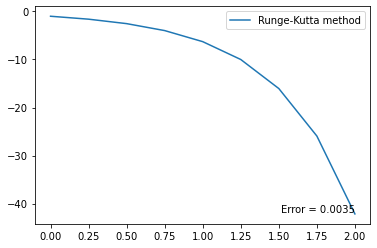

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + 2*y

x0, y0 = 0, -1
xf = 2
h = 0.25

# Создаем массивы для значений x и y
x = np.arange(x0, xf + h, h)
y = np.zeros_like(x)

# Задаем начальное значение y
y[0] = y0

# Решаем дифференциальное уравнение методом Рунге-Кутты 4-го порядка
for i in range(1, len(x)):
    k1 = h * f(x[i-1], y[i-1])
    k2 = h * f(x[i-1] + h/2, y[i-1] + k1/2)
    k3 = h * f(x[i-1] + h/2, y[i-1] + k2/2)
    k4 = h * f(x[i-1] + h, y[i-1] + k3)
    y[i] = y[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

# Вычисляем значение функции с h/2
h /= 2
x_d = np.arange(x0, xf + h, h)
y_double = np.zeros_like(x_d)
y_double[0] = y0

for i in range(1, len(x_d)):
    k1 = h * f(x_d[i-1], y_double[i-1])
    k2 = h * f(x_d[i-1] + h/2, y_double[i-1] + k1/2)
    k3 = h * f(x_d[i-1] + h/2, y_double[i-1] + k2/2)
    k4 = h * f(x_d[i-1] + h, y_double[i-1] + k3)
    y_double[i] = y_double[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)


# Вычисляем погрешность
err = np.abs(y[-1] - y_double[-1]) / (2**4 - 1)

# Строим график решения
plt.plot(x, y, label="Runge-Kutta method")
plt.legend()

# Выводим погрешность на график
plt.text(xf, y[-1], f"Error = {err:.4f}", ha="right", va="bottom")

plt.show()